In [1]:
# 회귀모형 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

# 쓸데없는 알림 방지
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import itertools

#통계적 모형
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

#머신러닝
from sklearn import datasets
from sklearn import metrics

from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error #연속형일때 사용하는 경우 
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix #범주형(분류모델)

반응변수 = Personal Loan(대출 유무) 
- 입력변수 
    - Experience : 경력
    - income : 수입
    - zip : 우편번호 
    - family : 가족 
    - CCabg : 월단위 카드 사용량 
    - education : 교육 수준
    - mortgage : 대출 
    - security account : 유가증권  계좌 유무 
    - cd account : 양도 예금증서 계좌 유무 
    - online : 온라인 계좌유무 
    - credit card : 신용카드 유무 

In [2]:
Loan_data = pd.read_csv('C:/Users/scien/Videos/Personal_Loan.csv')

In [1]:
Loan_data.info()

NameError: name 'Loan_data' is not defined

In [4]:
Loan_data['Personal Loan'].unique()

array([0, 1], dtype=int64)

ID index 이미 index 되어 있었음

In [5]:
Loan_data_Y = Loan_data[['Personal Loan']]
Loan_data_Y

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
2495,0
2496,0
2497,0
2498,0


In [6]:
columns =['Age','Experience','Income',	'Family',	'CCAvg',	'Education',	'Mortgage', 'Securities Account', 'CD Account','Online','CreditCard']

In [7]:
Loan_data_X = Loan_data[columns]
Loan_data_X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2495,46,22,70,4,1.9,1,212,0,0,0,1
2496,63,37,32,3,0.7,2,141,0,0,0,0
2497,33,9,14,3,0.9,3,114,0,0,0,0
2498,38,14,111,2,6.1,1,326,0,0,0,0


In [8]:
train_x, test_x, train_y, test_y = train_test_split(Loan_data_X, Loan_data_Y, train_size = 0.7, random_state = 123)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 11) (750, 11) (1750, 1) (750, 1)


In [9]:
static_model = sm.Logit(train_y, train_x).fit()

Optimization terminated successfully.
         Current function value: 0.139796
         Iterations 9


In [32]:
static_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1739
Method:                           MLE   Df Model:                           10
Date:                Fri, 08 Jan 2021   Pseudo R-squ.:                  0.5796
Time:                        12:32:13   Log-Likelihood:                -244.64
converged:                       True   LL-Null:                       -581.97
Covariance Type:            nonrobust   LLR p-value:                1.737e-138
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.4776      0.035    -13.479      0.000      -0.547      -0.408
Experience             0.4877      0.040     12.042      0.000       0.408       0.567
Income                 0.0458      0.004     12.018      0.000       0.038       0.053
Family                 0.5397      0.117      4.603      0.000       0.310       0.769
CCAvg                  0.1548      0.062      2.485      0.013       0.033       0.277
Education              1.6025      0.181      8.835      0.000       1.247       1.958
Mortgage               0.0003      0.001      0.308      0.758      -0.001       0.002
Securities Account    -1.6449      0.511     -3.217      0.001      -2.647      -0.643
CD Account             4.2596      0.541      7.875      0.000       3.199       5.320
Online                -0.3280      0.255     -1.285      0.199      -0.828       0.172
CreditCard            -1.4868      0.351     -4.237      0.000      -2.175      -0.799
======================================================================================
"""

In [10]:
machine_model = LogisticRegression().fit(train_x, train_y)

In [11]:
machine_model.coef_

array([[-4.38191186e-01,  4.42858102e-01,  4.31838573e-02,
         4.53948726e-01,  1.35042838e-01,  1.43575238e+00,
         4.05972746e-04,  2.01394161e-02,  2.50245398e+00,
         2.12816391e-01, -7.50881081e-01]])

In [12]:
pd.concat([pd.DataFrame(train_x.columns), pd.DataFrame(machine_model.coef_.T)], axis=1)

,0,0
0,Age,-0.438191
1,Experience,0.442858
2,Income,0.043184
3,Family,0.453949
4,CCAvg,0.135043
5,Education,1.435752
6,Mortgage,0.000406
7,Securities Account,0.020139
8,CD Account,2.502454
9,Online,0.212816


In [13]:
pred_y = machine_model.predict(test_x)

In [14]:
pd.concat([pd.DataFrame(test_y.values, columns=['Y']), pd.DataFrame(pred_y, columns=['Yhat'])], axis=1)

,Y,Yhat
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
745,0,0
746,0,0
747,1,0
748,0,0


In [15]:
cmat = confusion_matrix(test_y, pred_y)
cmat

array([[669,   6],
       [ 34,  41]], dtype=int64)

In [16]:
(cmat[0,0] + cmat[1,1]) / np.sum(cmat)

0.9466666666666667

findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.


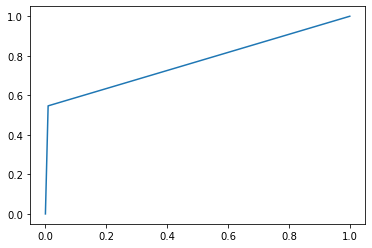

In [17]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)
plt.plot(fpr, tpr)
plt.show()

In [18]:
full_model = sm.OLS(train_y, train_x).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Personal Loan   R-squared (uncentered):                   0.475
Model:                            OLS   Adj. R-squared (uncentered):              0.472
Method:                 Least Squares   F-statistic:                              143.0
Date:                Fri, 08 Jan 2021   Prob (F-statistic):                   6.32e-234
Time:                        12:30:27   Log-Likelihood:                          65.794
No. Observations:                1750   AIC:                                     -109.6
Df Residuals:                    1739   BIC:                                     -49.45
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0151      0.001    -14.390      0.000      -0.017      -0.013
Experience             0.0158      0.001     11.934      0.000       0.013       0.018
Income                 0.0030      0.000     18.603      0.000       0.003       0.003
Family                 0.0290      0.005      5.950      0.000       0.019       0.039
CCAvg                  0.0144      0.004      3.528      0.000       0.006       0.022
Education              0.0833      0.007     11.963      0.000       0.070       0.097
Mortgage            6.738e-05   5.57e-05      1.209      0.227    -4.2e-05       0.000
Securities Account    -0.0808      0.019     -4.232      0.000      -0.118      -0.043
CD Account             0.3536      0.026     13.478      0.000       0.302       0.405
Online                -0.0143      0.012     -1.225      0.221      -0.037       0.009
CreditCard            -0.0619      0.013     -4.791      0.000      -0.087      -0.037
==============================================================================
Omnibus:                      428.751   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1052.852
Skew:                           1.320   Prob(JB):                    2.38e-229
Kurtosis:                       5.733   Cond. No.                         684.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
full_model_train_predict = full_model.predict(train_x)
pd.concat([train_y, full_model_train_predict], axis=1)

,Personal Loan,0
1351,0,0.143275
903,0,-0.038262
2049,0,0.201818
798,0,-0.067827
1360,0,0.138213
...,...,...
1147,0,0.187368
2154,0,0.008557
1766,0,-0.069868
1122,0,-0.146192


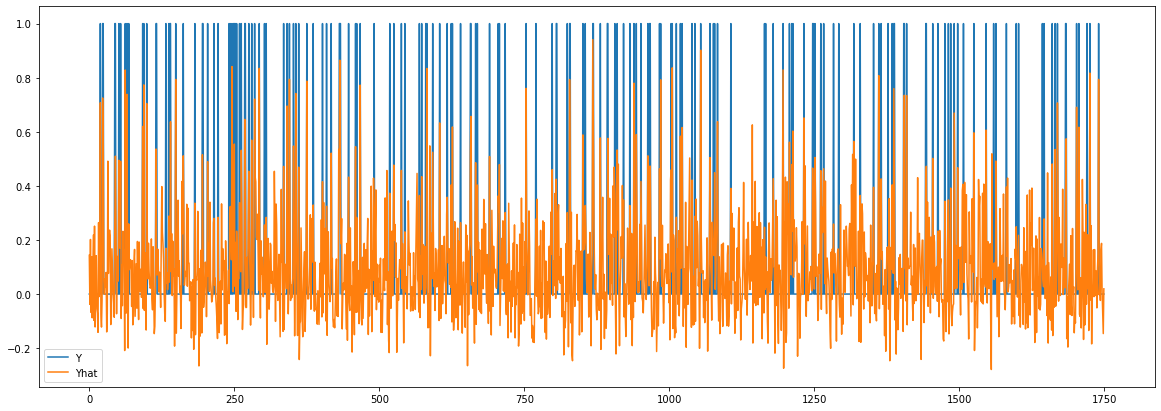

In [20]:
plt.figure(figsize=(20,7))
plt.plot(np.array(train_y), label='Y')
plt.plot(np.array(full_model_train_predict), label = 'Yhat')
plt.legend()
plt.show()

In [21]:
full_model_test_predict = full_model.predict(test_x)
pd.concat([test_y, full_model_test_predict], axis=1)

,Personal Loan,0
2386,0,0.006242
1298,0,0.041061
1995,0,-0.001353
2097,0,-0.094567
289,0,-0.133305
...,...,...
265,0,-0.006958
182,0,0.162775
899,1,0.352088
1927,0,0.019262


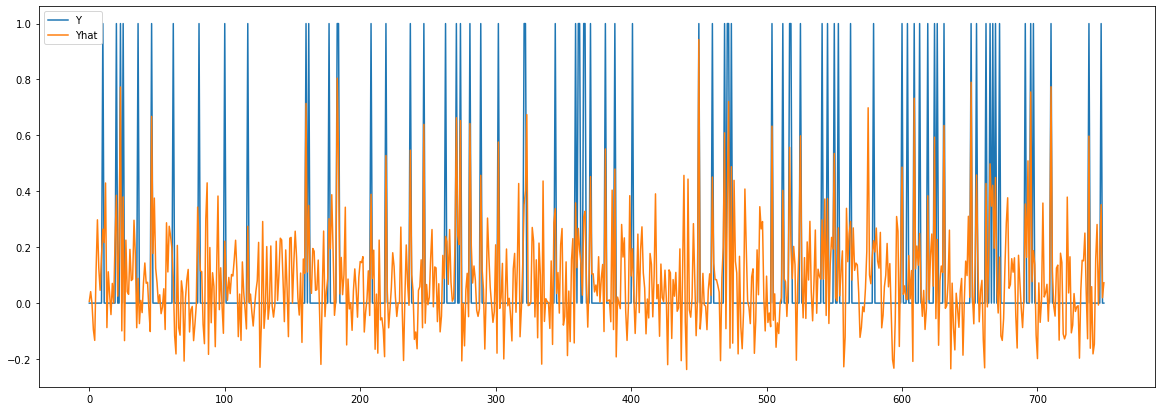

In [22]:
plt.figure(figsize=(20,7))
plt.plot(np.array(test_y), label='Y')
plt.plot(np.array(full_model_test_predict), label = 'Yhat')
plt.legend()
plt.show()

In [23]:
alphas = np.logspace(-3,1,5)

In [24]:
parameters = {'alpha' : alphas}

ridge = Ridge()
result_ridge = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=5)
result_ridge.fit(train_x, train_y)
result_ridge.best_params_

{'alpha': 0.1}

In [25]:
full_ridge_model = Ridge(alpha = 0.1, fit_intercept=False, normalize=False, random_state=1234).fit(train_x, train_y)

In [26]:
full_ridge_model.score(train_x, train_y)

0.4143415570914224

In [27]:
full_ridge_model.coef_.size

11

In [28]:
full_lasso_model = Lasso(alpha = 0.1, fit_intercept=False, normalize=False, random_state=1234).fit(train_x, train_y)

In [29]:
full_lasso_model.score(train_x, train_y)

0.26727463778403815

In [30]:
full_lasso_model.coef_.size

11

In [31]:
pd.concat([pd.DataFrame(train_x.columns), pd.DataFrame(full_lasso_model.coef_), pd.DataFrame(full_ridge_model.coef_.T)], axis=1 )

,0,0,0
0,Age,-0.003649,-0.015117
1,Experience,0.002358,0.015822
2,Income,0.003009,0.003006
3,Family,0.000000,0.029049
4,CCAvg,0.000000,0.014439
5,Education,0.000000,0.083346
6,Mortgage,0.000082,0.000067
7,Securities Account,0.000000,-0.080659
8,CD Account,0.000000,0.353140
9,Online,-0.000000,-0.014288
